Accuracy on the test set: 97.62%


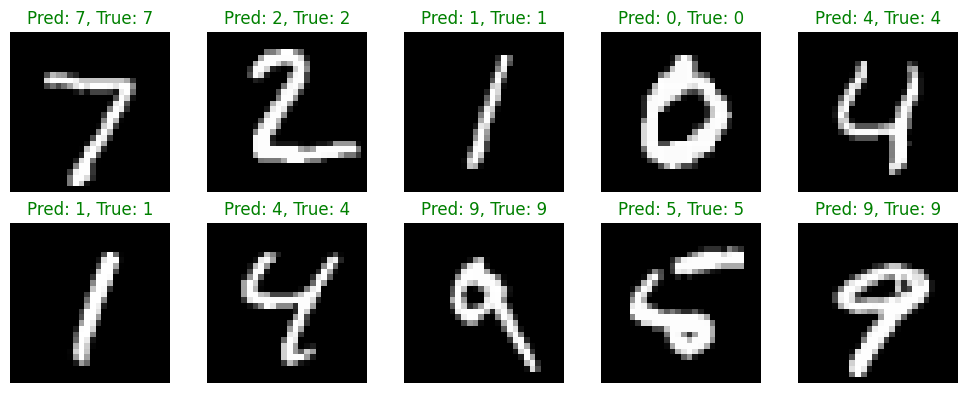

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Define transformations for the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean and std
])

# Load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data',  # Where to store the dataset
    train=True,     # This is training data
    download=True,  # Download if not present
    transform=transform  # Apply transformations
)

# Load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


# 1. define model structure
model = SimpleNN()  

# 2. loading weights
model.load_state_dict(torch.load('mnist_model.pth'))

# 3. choose hardware component to process
model.to("cpu")

# 4. Switch the model to evaluation mode (disable dropout and batch norm)
model.eval()
correct = 0
total = 0

# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to("cpu"), labels.to("cpu")
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')


# Function to show predictions
def show_predictions(images, labels, preds):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()

    for i in range(10):
        axes[i].imshow(images[i].cpu().reshape(28, 28), cmap='gray')
        color = 'green' if preds[i] == labels[i] else 'red'
        axes[i].set_title(f"Pred: {preds[i]}, True: {labels[i]}", color=color)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get predictions for some test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to("cpu"), labels.to("cpu")

outputs = model(images)
_, preds = torch.max(outputs, 1)

# Show predictions
show_predictions(images[:10], labels[:10], preds[:10])